In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

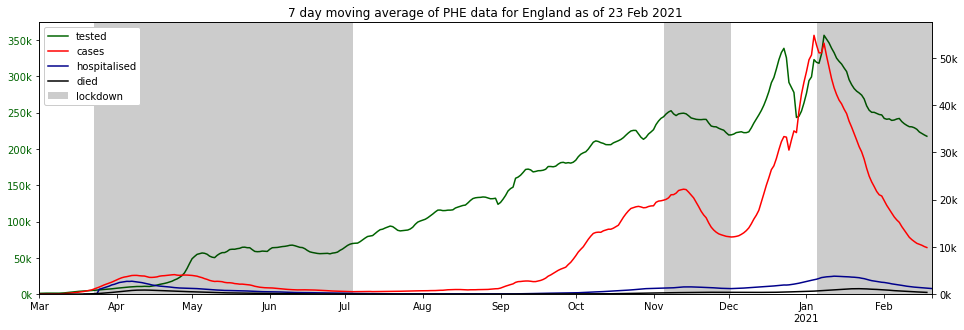

In [2]:
plot_summary(earliest_date='2020-03-01')

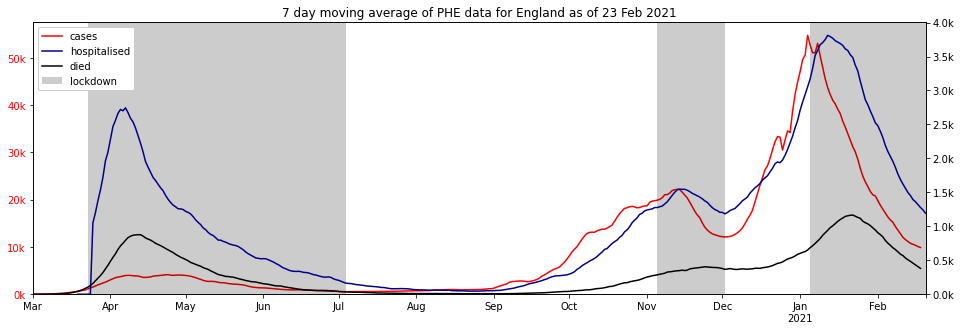

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,518779.0,15113158.0,14594379.0,56286961,0.921668,25.928525,73.149806
1,Northern Ireland,N92000002,31077.0,468129.0,437052.0,1893667,1.641102,23.079665,75.279233
2,Scotland,S92000003,43203.0,1465241.0,1422038.0,5463300,0.790786,26.028920,73.180294
3,Wales,W92000004,49729.0,869653.0,819924.0,3152879,1.577257,26.005565,72.417178


'partial: 17,916,181'

'full: 642,788'

66796807

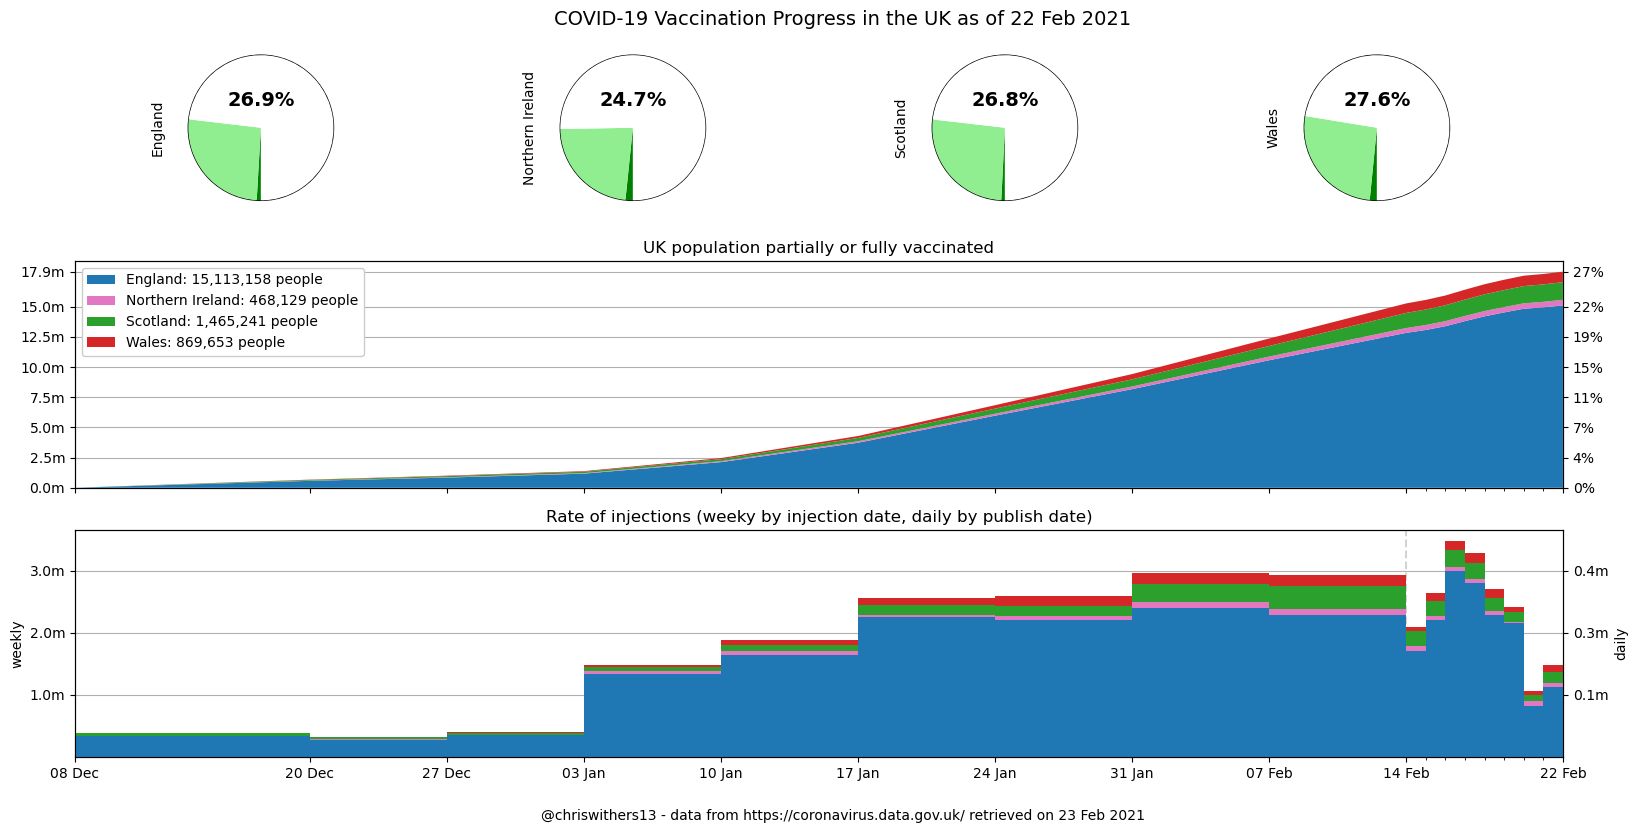

In [2]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,22 Feb 21,"+155,084","+5,344","+5,344","+15,113,158","+518,779","+518,779"
Northern Ireland,22 Feb 21,"+10,099",+281,+281,"+468,129","+31,077","+31,077"
Scotland,22 Feb 21,"+19,753","+5,861","+5,861","+1,465,241","+43,203","+43,203"
Wales,22 Feb 21,"+7,405","+6,977","+6,977","+869,653","+49,729","+49,729"


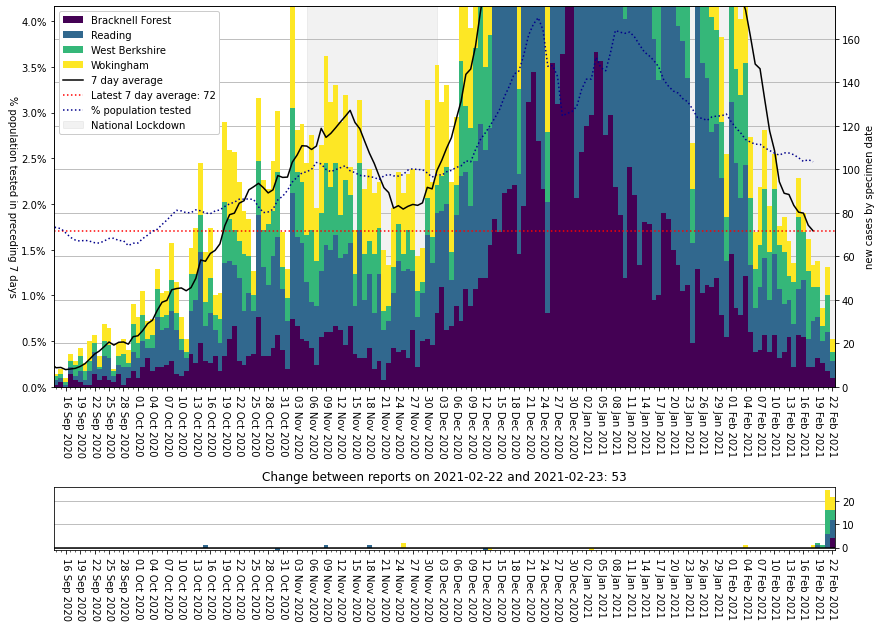

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

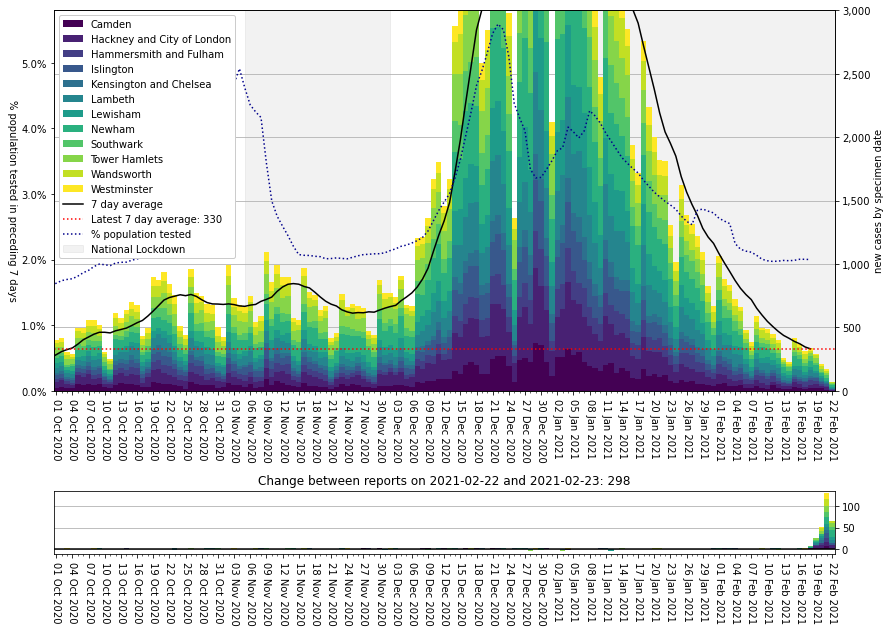

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,293.555623,212.0,2021-02-22
E06000031,Peterborough,234.352983,474.0,2021-02-22
E07000199,Tamworth,216.438928,166.0,2021-02-22
E06000016,Leicester,202.978906,719.0,2021-02-22
E07000218,North Warwickshire,200.723216,131.0,2021-02-22
E07000123,Preston,199.112726,285.0,2021-02-22
E07000236,Redditch,193.523416,165.0,2021-02-22
S12000014,Falkirk,191.435142,308.0,2021-02-22
E08000028,Sandwell,189.374334,622.0,2021-02-22


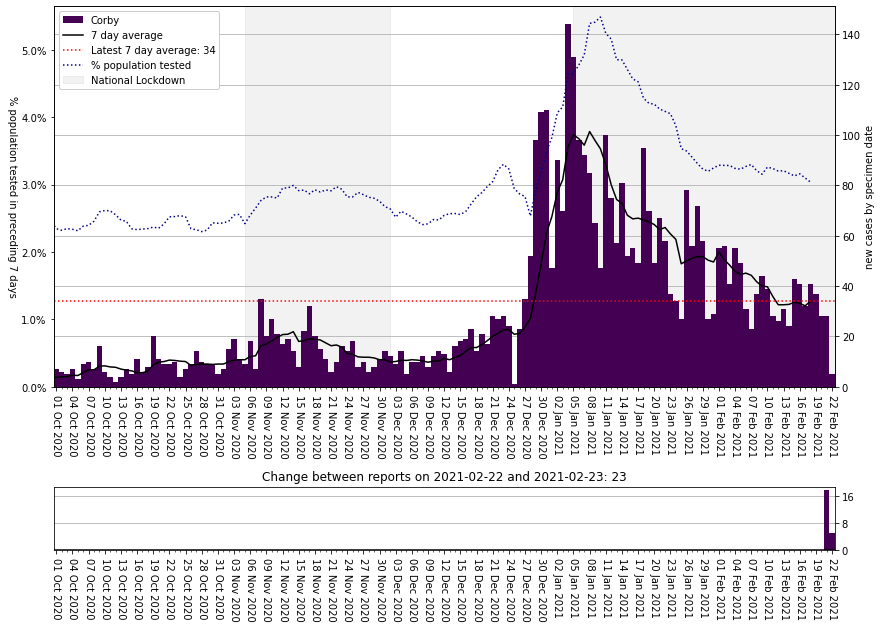

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,138.551220,1582.0,2021-02-22
E08000035,Leeds,139.950248,1110.0,2021-02-22
E08000032,Bradford,185.817821,1003.0,2021-02-22
S12000049,Glasgow City,127.306040,806.0,2021-02-22
E08000003,Manchester,144.702618,800.0,2021-02-22
E06000016,Leicester,202.978906,719.0,2021-02-22
E08000034,Kirklees,161.669172,711.0,2021-02-22
E08000019,Sheffield,113.361819,663.0,2021-02-22
E08000012,Liverpool,125.491424,625.0,2021-02-22


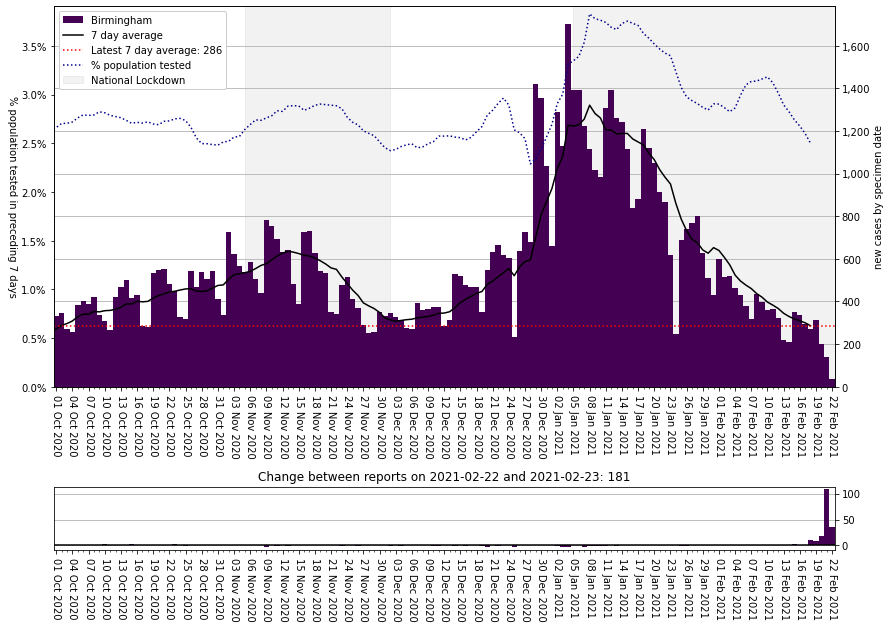

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.6
phe_max = 0.35

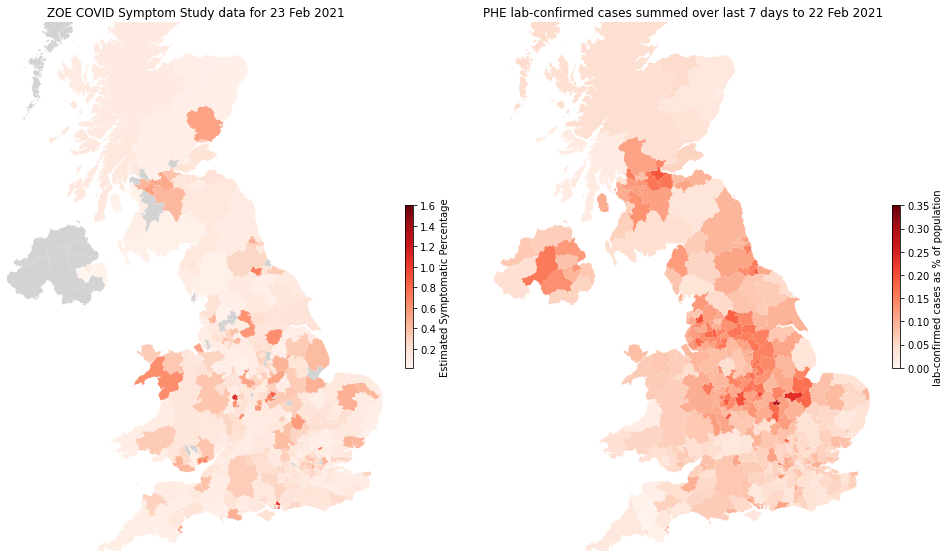

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

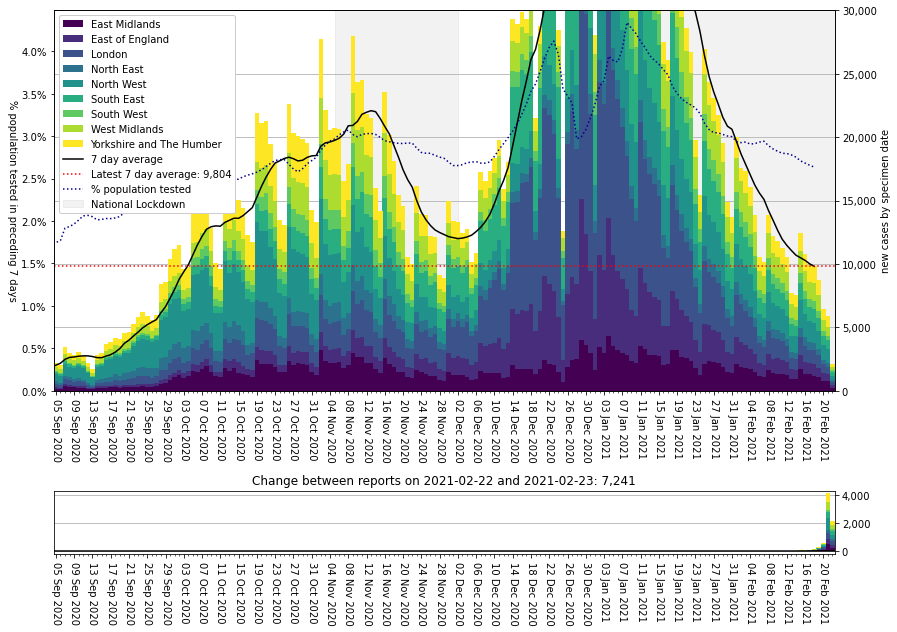

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

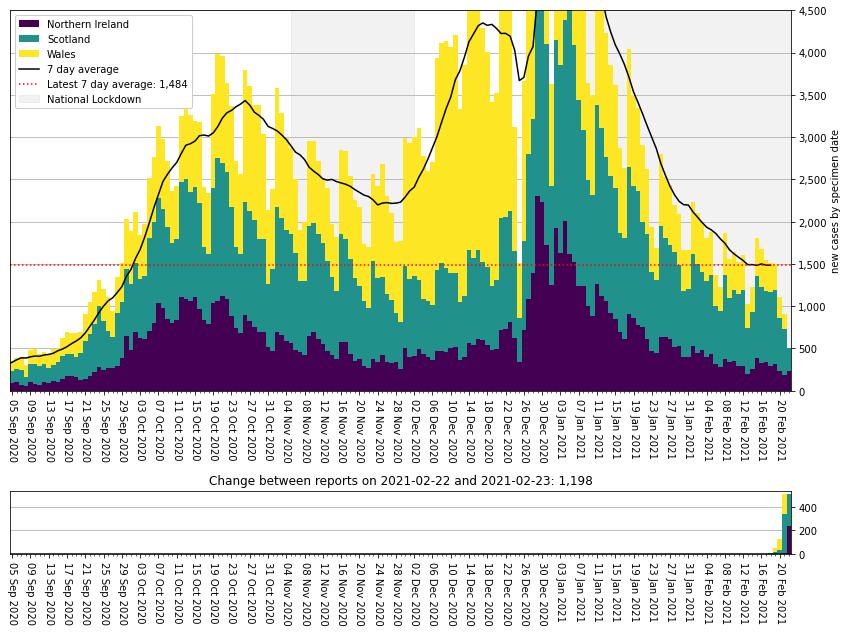

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')